In [1]:
import numpy as np, pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import widgets

In [ ]:
_Raw = r"C:\Users\user\Dropbox\BIO2CHP Team\Data logging\Playing\raw_files"
_Clean = r"C:\Users\user\Dropbox\BIO2CHP Team\Data logging\Playing\output_files"

In [ ]:
def clean_file(f, rawp = _Raw, cleanp = _Clean):
    df = pd.read_table(join(rawp, f), encoding="utf-16")
    df = df.pivot_table(values="VarValue", columns='VarName', index="TimeString")
    df = df[[c for c in df.columns if c.startswith('Sensor')]]
    df.to_csv(join(cleanp, f.split('.')[0] + '.csv'))

In [ ]:
for f in listdir(_Raw):
    if f.split('.')[0] not in [x.split('.')[0] for x in listdir(_Clean)]:
        clean_file(f)

In [137]:
f = r'C:\Users\user\Dropbox\BIO2CHP Team\Data logging\Playing\Data_log_10.txt'

In [138]:
df = pd.read_table(f, encoding="utf-16")
df.head()

,VarName,TimeString,VarValue,Validity,Time_ms
0,Group1,2019-06-20 10:40:57,6.016206e+07,1.0,4.363645e+10
1,Group2,2019-06-20 10:40:57,3.866084e+06,1.0,4.363645e+10
2,Group3,2019-06-20 10:40:57,2.147451e+09,1.0,4.363645e+10
3,Group4,2019-06-20 10:40:57,1.481137e+07,1.0,4.363645e+10
4,Group5,2019-06-20 10:40:57,1.553228e+07,1.0,4.363645e+10


In [ ]:
df['VarName'].unique()

In [ ]:
df = df.pivot_table(values="VarValue", columns='VarName', index="TimeString")
# df = df[[c for c in df.columns if c.startswith('Sensor')]]
# df.to_csv(join(cleanp, f.split('.')[0] + '.csv'))
df.head()

In [139]:
f = r'C:\Users\user\Dropbox\BIO2CHP Team\Data logging\Playing\Original output_2019-06-24.xlsx'

In [140]:
Df = pd.read_excel(f)
Df.head()

,PDRT-06,PDRT-09A,Time *10^6,Off SIGN,Off SIGN.1,Time *10^6.1,PRT-01,PRT-16,Time *10^6.2,Off PDRT-18,...,Time *10^6.16,Off VALVEPOS,Off VALVEPOS.1,Time *10^6.17,Off TE-18,Off TE-22A,Time *10^6.18,Off VALVESET,Off VALVESET.1,Time *10^6.19
0,2.490234,0.029839,4.363645e+10,NaN,NaN,NaN,837.442130,-9.331597,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
1,2.381727,0.032552,4.363645e+10,NaN,NaN,NaN,836.400463,-9.548611,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
2,2.362739,0.035265,4.363645e+10,NaN,NaN,NaN,835.937500,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
3,2.327474,0.035265,4.363645e+10,NaN,NaN,NaN,838.136574,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
4,2.273220,0.054253,4.363645e+10,NaN,NaN,NaN,838.078704,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN


In [371]:
df = Df.copy()

In [372]:
df.columns

Index(['PDRT-06', 'PDRT-09A', 'Time *10^6', 'Off SIGN', 'Off SIGN.1',
       'Time *10^6.1', 'PRT-01', 'PRT-16', 'Time *10^6.2', 'Off PDRT-18',
       'Off PDRT-19', 'Time *10^6.3', 'PDRT-09B', 'PDRT-10', 'Time *10^6.4',
       'Off PDRT-23', 'Off PDRT-24', 'Time *10^6.5', 'PDRT-13', 'Off PDRT-17',
       'Time *10^6.6', 'Off TE-22B', 'Off TE-23', 'Time *10^6.7', 'TE-09A',
       'TE-09B', 'Time *10^6.8', 'TE-32', 'TE-34', 'Time *10^6.9', 'TE-09C',
       'TE-09D', 'Time *10^6.10', 'Off LRT-01', 'Off LRT-29', 'Time *10^6.11',
       'TE-09E', 'TE-13B', 'Time *10^6.12', 'Off MRT-24A', 'Off MRT-24B',
       'Time *10^6.13', 'TE-14', 'TE-16', 'Time *10^6.14', 'Off OFRT-13',
       'Off NC', 'Time *10^6.15', 'TE-17B', 'Off TE-17C', 'Time *10^6.16',
       'Off VALVEPOS', 'Off VALVEPOS.1', 'Time *10^6.17', 'Off TE-18',
       'Off TE-22A', 'Time *10^6.18', 'Off VALVESET', 'Off VALVESET.1',
       'Time *10^6.19'],
      dtype='object')

In [373]:
# Drop columns including "off"
df = df.loc[:,~df.columns.str.contains('off', case=False)]
# Drop columns including "." --> Additional Time Columns
df = df.loc[:,~df.columns.str.contains('.', regex=False)]
# Format time
import xlrd
df['Time'] = df['Time *10^6'] * 10**(-6)
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
df['Time'] = pd.to_datetime(df['Time'].apply(read_date), errors='coerce')

df.head()

,PDRT-06,PDRT-09A,Time *10^6,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B,Time
0,2.490234,0.029839,4.363645e+10,837.442130,-9.331597,0.157335,-0.243164,88.886176,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4,2019-06-20 10:40:57.833
1,2.381727,0.032552,4.363645e+10,836.400463,-9.548611,0.165473,-0.242714,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,2019-06-20 10:40:58.829
2,2.362739,0.035265,4.363645e+10,835.937500,-8.680556,0.162760,-0.243164,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,2019-06-20 10:40:59.828
3,2.327474,0.035265,4.363645e+10,838.136574,-8.680556,0.157335,-0.245416,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4,2019-06-20 10:41:00.828
4,2.273220,0.054253,4.363645e+10,838.078704,-8.680556,0.143772,-0.246316,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4,2019-06-20 10:41:01.828


In [374]:
df['Time'].head()

0   2019-06-20 10:40:57.833
1   2019-06-20 10:40:58.829
2   2019-06-20 10:40:59.828
3   2019-06-20 10:41:00.828
4   2019-06-20 10:41:01.828
Name: Time, dtype: datetime64[ns]

In [375]:
a = df['Time'][0]

In [376]:
df['datetime'] = pd.to_datetime(df['Time'])
df = df.set_index('datetime')
df.drop(['Time', 'Time *10^6'], axis=1, inplace=True)
df.head()

,PDRT-06,PDRT-09A,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B
datetime,,,,,,,,,,,,,,,,,,
2019-06-20 10:40:57.833,2.490234,0.029839,837.442130,-9.331597,0.157335,-0.243164,88.886176,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:58.829,2.381727,0.032552,836.400463,-9.548611,0.165473,-0.242714,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:59.828,2.362739,0.035265,835.937500,-8.680556,0.162760,-0.243164,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:41:00.828,2.327474,0.035265,838.136574,-8.680556,0.157335,-0.245416,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4
2019-06-20 10:41:01.828,2.273220,0.054253,838.078704,-8.680556,0.143772,-0.246316,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4


In [201]:
# Source: https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

# df[df.index.second == 57]
# df['2019-06-20 10:40:57':'2019-06-20 10:40:58']
# df['2019-06-20 10:41']

In [377]:
df = df[df.index.day == 20]

In [378]:
df['aLPM'] = 700

In [228]:
h = 10
m = 41
s = 13

In [229]:
df.loc["2019-06-20 %s:%s:%s"%(h,m,s):, "aLPM"] = 750

In [230]:
h = 13
m = 0
s = 0

In [231]:
df.loc["2019-06-20 %s:%s:%s"%(h,m,s):, "aLPM"] = 650

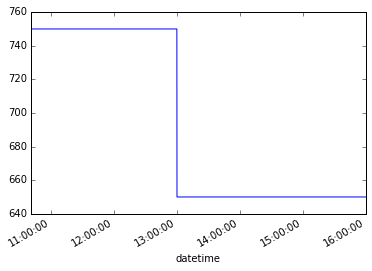

In [233]:
df['aLPM'].plot()

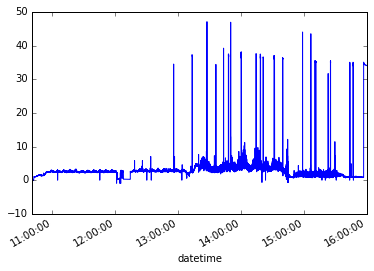

In [379]:
df['PDRT-09A'].plot()

In [380]:
def ident_outliers(D, c):
    m = D[c].mean(); s = D[c].std()
    return np.abs(D[c] - m) / s > 3

In [385]:
def clean_outliers(D, c):
    D.ix[ident_outliers(D, c), c] = np.nan
    return D[c]

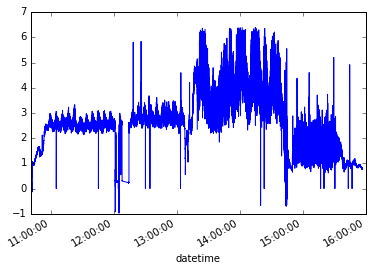

In [383]:
# df['PDRT-09A-C'] = df['PDRT-09A'][df['PDRT-09A'].apply(lambda x: np.abs(x - m) / s < 3)]
# df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]

clean_outliers(df, 'PDRT-09A').plot()

In [ ]:
# for interactive widgets check https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/

In [ ]:
from IPython.display import display, clear_output
text = widgets.Text()
display(text)

def handle_submit(sender):
    clear_output()
    print(text.value)

text.on_submit(handle_submit)

In [ ]:
# https://stackoverflow.com/questions/36163900/taking-user-input-python-gui

In [42]:
import numpy as np, pandas as pd
from os import listdir
from os.path import join
import matplotlib.pyplot as plt

from tkinter import *
from tkinter.filedialog import askopenfilename

In [43]:
# Get file name
Tk().withdraw()
filename = askopenfilename()

# Read file
df = pd.read_excel(filename)

In [44]:
df.head()

,PDRT-06,PDRT-09A,Time *10^6,Off SIGN,Off SIGN.1,Time *10^6.1,PRT-01,PRT-16,Time *10^6.2,Off PDRT-18,...,Time *10^6.16,Off VALVEPOS,Off VALVEPOS.1,Time *10^6.17,Off TE-18,Off TE-22A,Time *10^6.18,Off VALVESET,Off VALVESET.1,Time *10^6.19
0,2.490234,0.029839,4.363645e+10,NaN,NaN,NaN,837.442130,-9.331597,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
1,2.381727,0.032552,4.363645e+10,NaN,NaN,NaN,836.400463,-9.548611,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
2,2.362739,0.035265,4.363645e+10,NaN,NaN,NaN,835.937500,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
3,2.327474,0.035265,4.363645e+10,NaN,NaN,NaN,838.136574,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN
4,2.273220,0.054253,4.363645e+10,NaN,NaN,NaN,838.078704,-8.680556,4.363645e+10,NaN,...,4.363645e+10,NaN,NaN,NaN,3276.7,3276.7,4.363645e+10,NaN,NaN,NaN


In [45]:
# use Tkinter's dialogs to ask for input
# dialogs are askfloat, askinteger, and askstring
# mofified for Python30
from tkinter.simpledialog import askstring
root = Tk()
# show askstring dialog without the Tkinter window
root.withdraw()
s = askstring("s", "Enter string contained in columns to be removed:")
# Drop columns including string
df = df.loc[:,~df.columns.str.contains(s, case=False)]

In [46]:
df.head()

,PDRT-06,PDRT-09A,Time *10^6,Time *10^6.1,PRT-01,PRT-16,Time *10^6.2,Time *10^6.3,PDRT-09B,PDRT-10,...,Time *10^6.13,TE-14,TE-16,Time *10^6.14,Time *10^6.15,TE-17B,Time *10^6.16,Time *10^6.17,Time *10^6.18,Time *10^6.19
0,2.490234,0.029839,4.363645e+10,NaN,837.442130,-9.331597,4.363645e+10,NaN,0.157335,-0.243164,...,NaN,23.3,23.0,4.363645e+10,NaN,26.4,4.363645e+10,NaN,4.363645e+10,NaN
1,2.381727,0.032552,4.363645e+10,NaN,836.400463,-9.548611,4.363645e+10,NaN,0.165473,-0.242714,...,NaN,23.3,23.0,4.363645e+10,NaN,26.4,4.363645e+10,NaN,4.363645e+10,NaN
2,2.362739,0.035265,4.363645e+10,NaN,835.937500,-8.680556,4.363645e+10,NaN,0.162760,-0.243164,...,NaN,23.3,23.0,4.363645e+10,NaN,26.4,4.363645e+10,NaN,4.363645e+10,NaN
3,2.327474,0.035265,4.363645e+10,NaN,838.136574,-8.680556,4.363645e+10,NaN,0.157335,-0.245416,...,NaN,23.3,23.0,4.363645e+10,NaN,26.4,4.363645e+10,NaN,4.363645e+10,NaN
4,2.273220,0.054253,4.363645e+10,NaN,838.078704,-8.680556,4.363645e+10,NaN,0.143772,-0.246316,...,NaN,23.3,23.0,4.363645e+10,NaN,26.4,4.363645e+10,NaN,4.363645e+10,NaN


In [47]:
# Drop columns including "." --> Additional Time Columns
df = df.loc[:,~df.columns.str.contains('.', regex=False)]
# Format time
import xlrd
df['Time'] = df['Time *10^6'] * 10**(-6)
def read_date(date):
    return xlrd.xldate.xldate_as_datetime(date, 0)
df['Time'] = pd.to_datetime(df['Time'].apply(read_date), errors='coerce')

df['datetime'] = pd.to_datetime(df['Time'])
df = df.set_index('datetime')
df.drop(['Time', 'Time *10^6'], axis=1, inplace=True)

In [48]:
df.head()

,PDRT-06,PDRT-09A,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B
datetime,,,,,,,,,,,,,,,,,,
2019-06-20 10:40:57.833,2.490234,0.029839,837.442130,-9.331597,0.157335,-0.243164,88.886176,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:58.829,2.381727,0.032552,836.400463,-9.548611,0.165473,-0.242714,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:59.828,2.362739,0.035265,835.937500,-8.680556,0.162760,-0.243164,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:41:00.828,2.327474,0.035265,838.136574,-8.680556,0.157335,-0.245416,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4
2019-06-20 10:41:01.828,2.273220,0.054253,838.078704,-8.680556,0.143772,-0.246316,88.886176,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4


In [49]:
### Clean Outliers
#
def ident_outliers(D, c):
    m = D[c].mean(); s = D[c].std()
    return np.abs(D[c] - m) / s > 3

def clean_outliers(D, c):
    D.ix[ident_outliers(D, c), c] = np.nan
    return D[c]

for c in df.columns:
    clean_outliers(df, c)

In [51]:
df.head() ############## PRT-01 & PDRT-10 etc are fucked!!!!!!!!!1

,PDRT-06,PDRT-09A,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B
datetime,,,,,,,,,,,,,,,,,,
2019-06-20 10:40:57.833,2.490234,0.029839,NaN,-9.331597,0.157335,-0.243164,NaN,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:58.829,2.381727,0.032552,NaN,-9.548611,0.165473,-0.242714,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:40:59.828,2.362739,0.035265,NaN,-8.680556,0.162760,-0.243164,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4
2019-06-20 10:41:00.828,2.327474,0.035265,NaN,-8.680556,0.157335,-0.245416,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4
2019-06-20 10:41:01.828,2.273220,0.054253,NaN,-8.680556,0.143772,-0.246316,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4


In [52]:
### Add Air Flow
#

# Source: https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html
# df[df.index.second == 57]
# df['2019-06-20 10:40:57':'2019-06-20 10:40:58']
# df['2019-06-20 10:41']


date = str(df.index[0]).split()[0]

from tkinter.simpledialog import askinteger

root = Tk()
root.withdraw()

lpm = askinteger("lpm", "Enter starting air flow in LPM")
df['Air flow [LPM]'] = lpm

l = lpm
while l != 999:
    l = askinteger("l", "Enter new air flow rate [LPM]\n# Set 999 if no other change has occured")
    if l == 999:
        break
    h = askinteger("h", "Enter hour of air flow change [0-23]")
    m = askinteger("m", "Enter minute of air flow change [0-59]")
    s = askinteger("s", "Enter second of air flow change [0-59]")
    
    # This will replace the air flow rate from the specified timestamp till the end of the test
    df.loc["%s %s:%s:%s"%(date, h, m, s):, 'Air flow [LPM]'] = l

In [53]:
df.head()

,PDRT-06,PDRT-09A,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B,Air flow [LPM]
datetime,,,,,,,,,,,,,,,,,,,
2019-06-20 10:40:57.833,2.490234,0.029839,NaN,-9.331597,0.157335,-0.243164,NaN,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4,700
2019-06-20 10:40:58.829,2.381727,0.032552,NaN,-9.548611,0.165473,-0.242714,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,700
2019-06-20 10:40:59.828,2.362739,0.035265,NaN,-8.680556,0.162760,-0.243164,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,650
2019-06-20 10:41:00.828,2.327474,0.035265,NaN,-8.680556,0.157335,-0.245416,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4,650
2019-06-20 10:41:01.828,2.273220,0.054253,NaN,-8.680556,0.143772,-0.246316,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4,650


In [54]:
### Add Inverter
#

from tkinter.simpledialog import askfloat

root = Tk()
root.withdraw()

hz = askfloat("hz", "Enter starting inverter value in Hz")
df['Inverter Value [Hz]'] = hz

z = hz
while z != 999:
    z = askfloat("z", "Enter new inverter value [Hz]\n# Set 999 if no other change has occured")
    if z == 999:
        break
    h = askinteger("h", "Enter hour of inverter value change [0-23]")
    m = askinteger("m", "Enter minute of inverter value change [0-59]")
    s = askinteger("s", "Enter second of inverter value change [0-59]")
    
    # This will replace the inverter value from the specified timestamp till the end of the test
    df.loc["%s %s:%s:%s"%(date, h, m, s):, 'Inverter Value [Hz]'] = z

In [55]:
df.head()

,PDRT-06,PDRT-09A,PRT-01,PRT-16,PDRT-09B,PDRT-10,PDRT-13,TE-09A,TE-09B,TE-32,TE-34,TE-09C,TE-09D,TE-09E,TE-13B,TE-14,TE-16,TE-17B,Air flow [LPM],Inverter Value [Hz]
datetime,,,,,,,,,,,,,,,,,,,,
2019-06-20 10:40:57.833,2.490234,0.029839,NaN,-9.331597,0.157335,-0.243164,NaN,22.6,23.4,NaN,NaN,23.7,24.7,25.7,23.6,23.3,23.0,26.4,700,40.0
2019-06-20 10:40:58.829,2.381727,0.032552,NaN,-9.548611,0.165473,-0.242714,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,700,40.0
2019-06-20 10:40:59.828,2.362739,0.035265,NaN,-8.680556,0.162760,-0.243164,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.6,23.3,23.0,26.4,650,40.0
2019-06-20 10:41:00.828,2.327474,0.035265,NaN,-8.680556,0.157335,-0.245416,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.7,23.5,23.3,23.0,26.4,650,37.3
2019-06-20 10:41:01.828,2.273220,0.054253,NaN,-8.680556,0.143772,-0.246316,NaN,23.0,23.4,NaN,NaN,23.7,24.6,25.6,23.5,23.3,23.0,26.4,650,37.3


In [9]:
from tkinter import Tk, BOTH
from tkinter.ttk import Frame, Button, Style

class Example(Frame):

    def __init__(self):
        super().__init__()

        self.initUI()


    def initUI(self):

#         self.style = Style()
#         self.style.theme_use("clam")

        Style().configure("TFrame", background="#333")
        
        self.master.title("Quit button")
        self.pack(fill=BOTH, expand=1)

        quitButton = Button(self, text="Quit", command=self.quit)
        quitButton.place(x=50, y=50)
        
        


In [2]:
from tkinter import Tk, RIGHT, BOTH, RAISED
from tkinter.ttk import Frame, Button, Style

class Example(Frame):

    def __init__(self):
        super().__init__()

        self.initUI()


    def initUI(self):

        self.master.title("Buttons")
        self.style = Style()
        self.style.theme_use("clam")

        frame = Frame(self, relief=RAISED, borderwidth=1)
        frame.pack(fill=BOTH, expand=True)

        self.pack(fill=BOTH, expand=True)

        closeButton = Button(self, text="Close")
        closeButton.pack(side=RIGHT, padx=5, pady=5)
        okButton = Button(self, text="OK")
        okButton.pack(side=RIGHT)
        
root = Tk()
root.geometry("250x150+300+300")
app = Example()
root.mainloop()

In [4]:
from tkinter import Tk, Text, BOTH, W, N, E, S
from tkinter.ttk import Frame, Button, Label, Style


class Example(Frame):

    def __init__(self):
        super().__init__()

        self.initUI()


    def initUI(self):

        self.master.title("Windows")
        self.pack(fill=BOTH, expand=True)

        self.columnconfigure(1, weight=1)
        self.columnconfigure(3, pad=7)
        self.rowconfigure(3, weight=1)
        self.rowconfigure(5, pad=7)

        lbl = Label(self, text="Windows")
        lbl.grid(sticky=W, pady=4, padx=5)

        area = Text(self)
        area.grid(row=1, column=0, columnspan=2, rowspan=4,
            padx=5, sticky=E+W+S+N)

        abtn = Button(self, text="Activate")
        abtn.grid(row=1, column=3)

        cbtn = Button(self, text="Close")
        cbtn.grid(row=2, column=3, pady=4)

        hbtn = Button(self, text="Help")
        hbtn.grid(row=5, column=0, padx=5)

        obtn = Button(self, text="OK")
        obtn.grid(row=5, column=3)


def main():

    root = Tk()
    root.geometry("350x300+300+300")
    app = Example()
    root.mainloop()
    
main()